### Final Project: Exploring Factors Influencing Health and Lifestyle Choices

Project Title: "Data-Driven Insights on Health and Lifestyle: Analyzing Correlations and Testing Hypotheses"

In [110]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

1. Dataset

In [112]:
data = pd.read_csv("C:/Users/dbwjd/Downloads/Cardiovascular_Disease_Dataset.csv")
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


1. (1) Dataset exploration and cleaning

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [114]:
data.isnull().sum().sum()

0

In [115]:
data.duplicated().sum()

0

In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


In [117]:
data.dropna()
# Nothing changed since no missing value exists

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


2. Project Requirements

2.(1) Exploratory Data Analysis (EDA)

* Perform an initial analysis of the dataset. Summarize key statistics such as mean, median, and standard deviation for continuous variables.

In [118]:
summary_stats =  data.describe()

continuous_variables = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
summary_stats_continuous = data[continuous_variables].describe()

print(summary_stats_continuous)

              age    restingBP  serumcholestrol  maxheartrate      oldpeak
count  1000.00000  1000.000000      1000.000000   1000.000000  1000.000000
mean     49.24200   151.747000       311.447000    145.477000     2.707700
std      17.86473    29.965228       132.443801     34.190268     1.720753
min      20.00000    94.000000         0.000000     71.000000     0.000000
25%      34.00000   129.000000       235.750000    119.750000     1.300000
50%      49.00000   147.000000       318.000000    146.000000     2.400000
75%      64.25000   181.000000       404.250000    175.000000     4.100000
max      80.00000   200.000000       602.000000    202.000000     6.200000


* Create visualizations (e.g., histograms, boxplots) to show the distribution of variables.

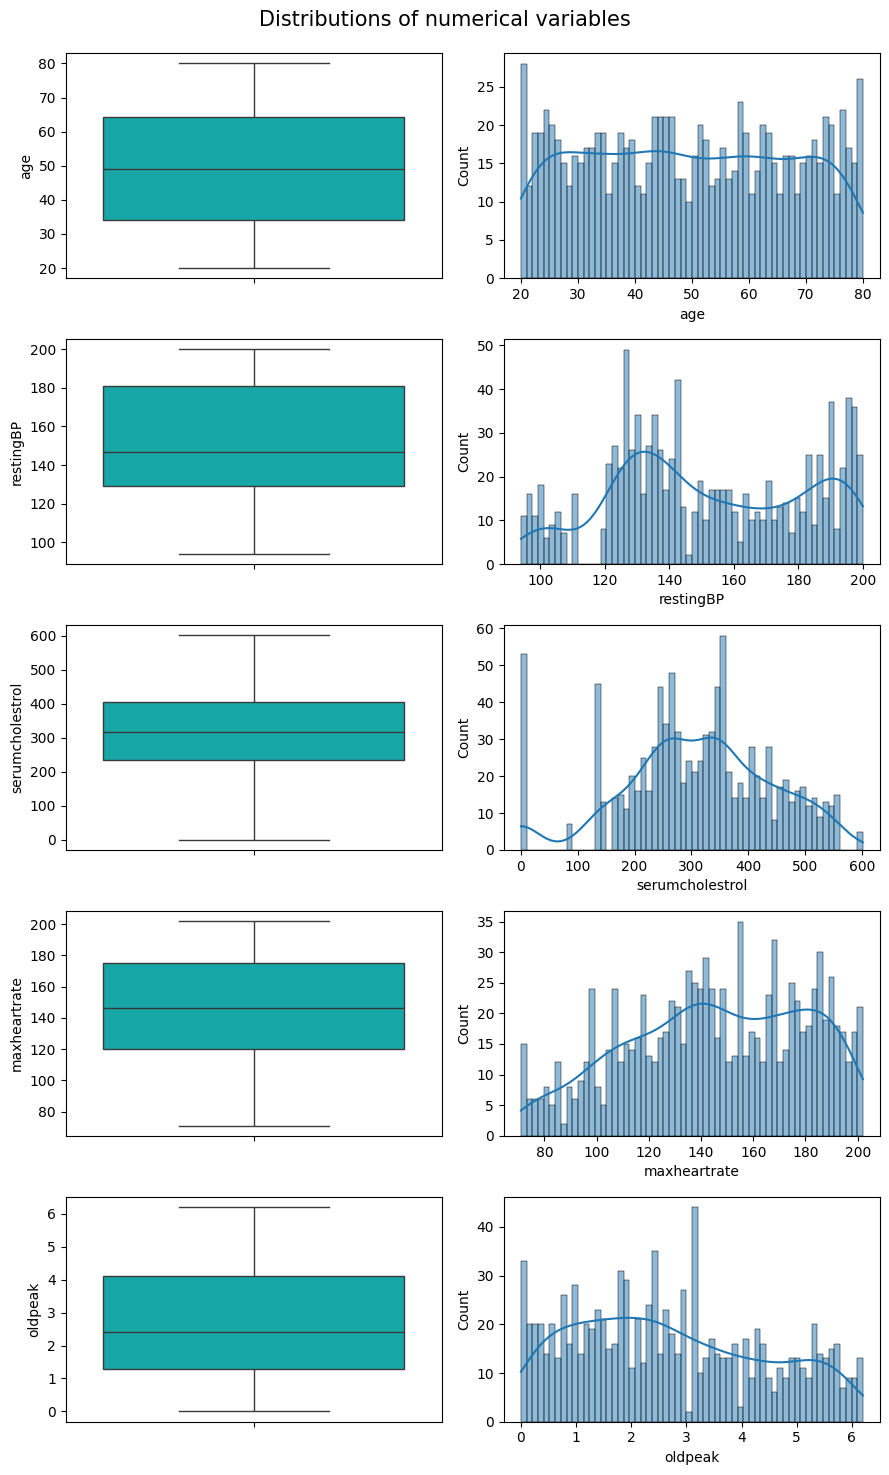

In [119]:
plt.figure(figsize=(9,15))
j = 1
for i in continuous_variables:
    plt.subplot(5,2, j)
    sns.boxplot(data[i], color="c")
    plt.subplot(5,2, j+1)
    sns.histplot(data[i], bins=60, kde=True)
    j = j +2
    plt.suptitle("Distributions of numerical variables\n", fontsize=15)
plt.tight_layout()
plt.show()


2. (2) Hypothesis Testing

Hypothesis 1: 
* Null Hypothesis (H0): Cholesterol levels are not associated with the likelihood of experiencing chest pain

* Alternative Hypothesis (Ha): Higher cholesterol levels increase the likelihood of experiencing chest pain (chestpain >0)

T-Test

In [120]:
from scipy.stats import ttest_ind

# groups based on chest pain
chestpain_group = data[data['chestpain'] > 0]['serumcholestrol']
no_chestpain_group = data[data['chestpain'] == 0]['serumcholestrol']

t_stat, p_value = ttest_ind(chestpain_group, no_chestpain_group)

print(f"p_value is {p_value}")

if p_value < 0.05:
    print(f"Reject the null hypothesis (p = {p_value:.4f}): Cholesterol levles are associated with chest pain.")
else:
    print(f"Fail to reject the null hypotesis (p = {p_value:.4f}): No significant association between cholesterol levels and chest pain.")


p_value is 2.6996900265082974e-07
Reject the null hypothesis (p = 0.0000): Cholesterol levles are associated with chest pain.


Hypothesis 2: 
* Null Hypothesis (H0): There is no difference in the prevalence of cardiovascular disease between older patients (age > 50) and younger patients (age ≤ 50)

* Alternative Hypothesis (H1): Older patients (age > 50) have a higher prevalence of cardiovascular disease than younger patients (age ≤ 50)

Z-Test

In [121]:
from statsmodels.stats.proportion import proportions_ztest

data['age_group'] = ['Older' if x > 50 else 'Younger' for x in data['age']]

# the number of patients with cardiovascular disease in each group
count_older = data[data['age_group'] == 'Older']['target'].sum()
count_younger = data[data['age_group'] == 'Younger']['target'].sum()

# the number of patients in each group
n_older = data[data['age_group'] == 'Older'].shape[0]
n_younger = data[data['age_group'] == 'Younger'].shape[0]


count = [count_older, count_younger]
n = [n_older, n_younger]
z_stat, p_value = proportions_ztest (count, n)

print(f"Z-Statistic: {z_stat:4f}")
print(f"P-value: {p_value:4f}")
print()

if p_value < 0.05:
    print(f"Reject tht null hypothesis (p = {p_value:4f}): Older patients have a higher prevalence of cardiovascular disease.")
else:
    print(f"Fail to reject the null hypothesis (p = {p_value:4f}): No significant difference in cardiovascular disease prevalence between older and younger patinets.")


Z-Statistic: -0.287316
P-value: 0.773870

Fail to reject the null hypothesis (p = 0.773870): No significant difference in cardiovascular disease prevalence between older and younger patinets.


ANOVA

Hypothesis 3:
* Null Hypotesis (H0): The number of major blood vessels is the same across gender (no difference in means).

* Alternative Hypothesis (H1): The number of major blood vessels differs between males and females (at least one gender has a different mean).

In [122]:
import scipy.stats as stats

f_statistic, p_value = stats.f_oneway(
    data[data['gender'] == 1]['noofmajorvessels'], #male
    data[data['gender'] == 0]['noofmajorvessels']  #female

)

print(f"F-statistic: {f_statistic}")
print(f"p_value: {p_value}")
print()

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the number of major blood vessels between genders.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of major blood vessels between genders.")


F-statistic: 0.861952093337553
p_value: 0.3534174724463588

Fail to reject the null hypothesis: There is no significant difference in the number of major blood vessels between genders.


2. (3) Correlation Testing

Is there a Pearson correlation between age and serum cholesterol levels?

In [152]:
correlation_coefficient, p_value = stats.pearsonr(data['age'], data['serumcholestrol'])

print(f"Pearson correlation between age and serumcholestrol: {pearson_corr:.2f}")
print(f"P-Value: {p_value:.4f}")

Pearson correlation between age and serumcholestrol: 0.04
P-Value: 0.2629


Scatterplot

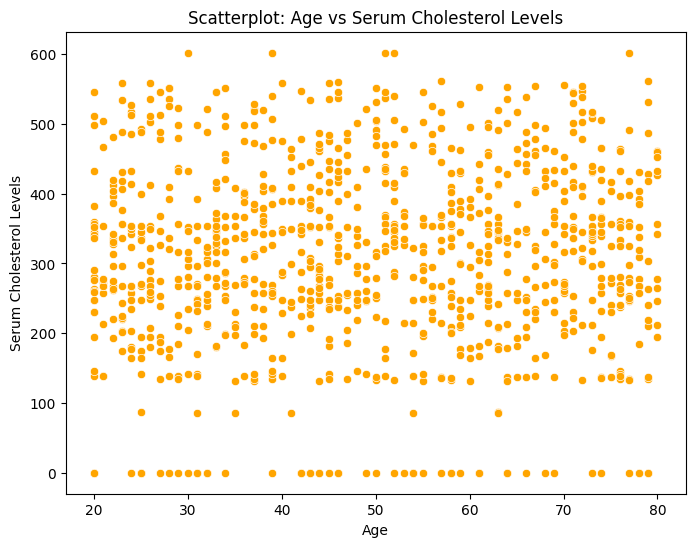

In [124]:
# scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['age'], y=data['serumcholestrol'], color='orange')
plt.title('Scatterplot: Age vs Serum Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Serum Cholesterol Levels')
plt.show()

- The data points are widely scattered with no apparent trend, indicating no significant linear relationship. Serum cholesterol levels appear to vary widely across all age groups, with no clear increase or decrease in cholesterol levels as age increases.

- There is no significant linear relationship between age and serum cholesterol levels.

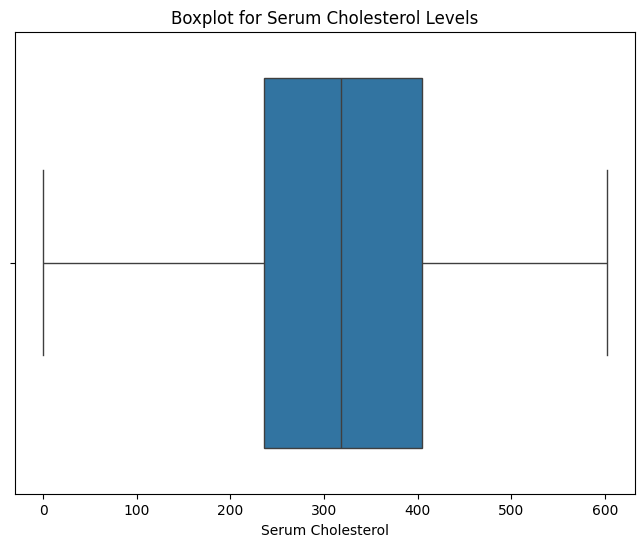

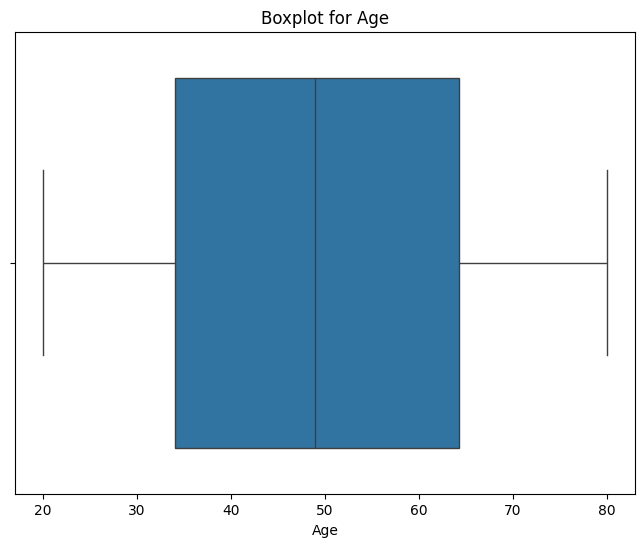

In [225]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['serumcholestrol'])

plt.title('Boxplot for Serum Cholesterol Levels')
plt.xlabel('Serum Cholesterol')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=data['age'])

plt.title('Boxplot for Age')
plt.xlabel('Age')
plt.show()

Heatmap

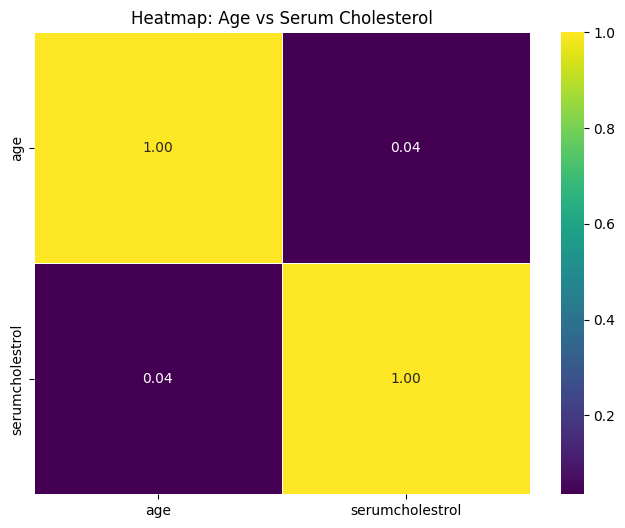

In [142]:
subset_data = data[['age', 'serumcholestrol']]

correlation_matrix = subset_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

plt.title('Heatmap: Age vs Serum Cholesterol')
plt.show()

- The correlation coefficient is close to 0, indicating weak linear relationships between most variables.
- Age would not be a reliable predictor for serum cholesterol levels.

- There are no notable strong linear relationships among these variables.

Is there a Spearman correlation between max heart rate and oldpeak (heart strain during exercise)?

In [126]:
from scipy.stats import spearmanr

rho, p_value = spearmanr(data['maxheartrate'], data['oldpeak'])

print(f"Spearman Correlation Coefficient: {rho:.2f}")
print(f"P-value: {p_value:.4f}")

Spearman Correlation Coefficient: 0.04
P-value: 0.2336


Scatterplot

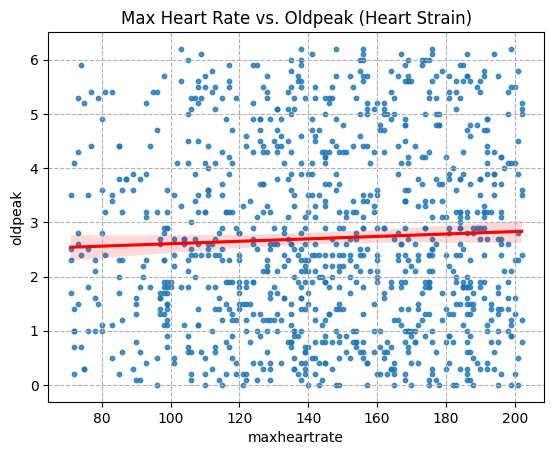

In [215]:
# Scatterplot for maxheartrate vs. oldpeak
sns.regplot(x='maxheartrate', y='oldpeak', data=data, scatter_kws={'s':10}, line_kws={"color":"r"})
plt.title("Max Heart Rate vs. Oldpeak (Heart Strain)")
plt.grid(True, linestyle='--')
plt.show()


- The data points would likely show no clear trend or pattern, and the points would be scattered randomly with no discernible upward or downward slope.

- The p-value of 0.2336 indicates that the correlation is not statistically significant at common significance levels. This means there's insufficient evidence to suggest that max heart rate and oldpeak are meaningfully related in the data.

Heatmap

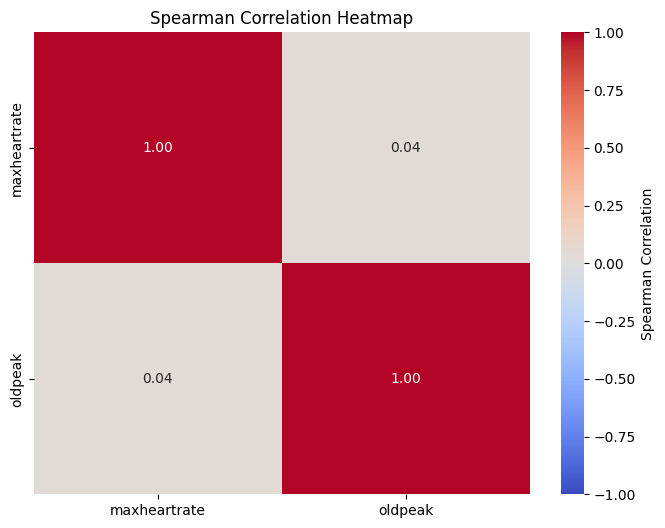

In [131]:
continuous_vars = data[['maxheartrate', 'oldpeak']]
spearman_corr = continuous_vars.corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar_kws={'label': 'Spearman Correlation'})
plt.title("Spearman Correlation Heatmap")
plt.show()

- The heatmap shows a very low correlation value of 0.04 between age and serum cholesterol, which is represented in a neutral color, indicating a lack of a significant relationship between the two variables.

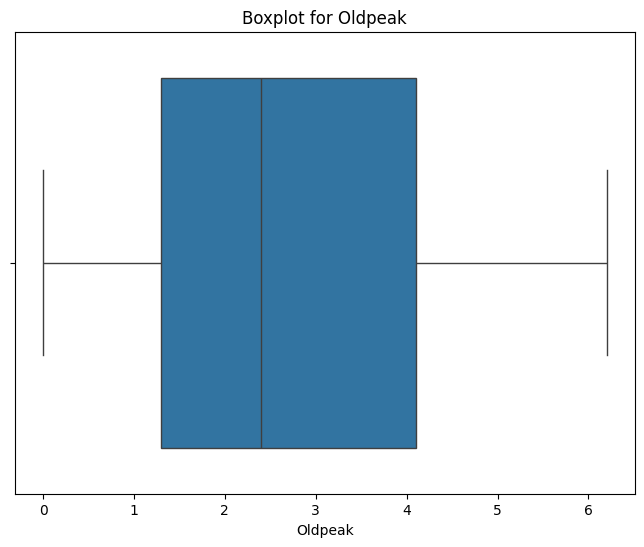

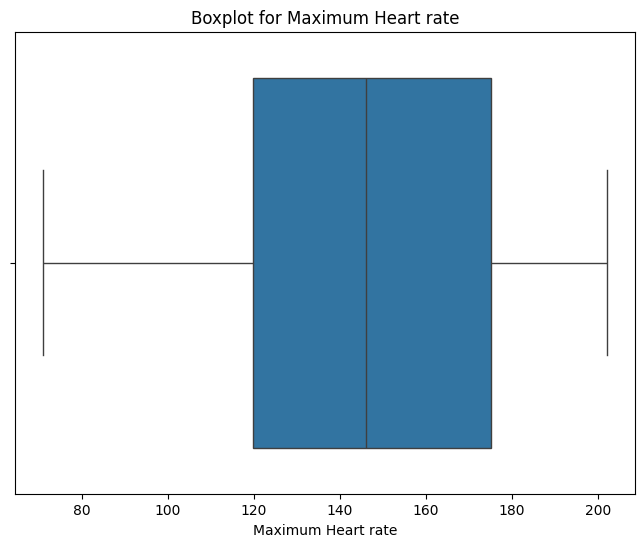

In [227]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['oldpeak'])

plt.title('Boxplot for Oldpeak')
plt.xlabel('Oldpeak')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=data['maxheartrate'])

plt.title('Boxplot for Maximum Heart rate')
plt.xlabel('Maximum Heart rate')
plt.show()

Is there a Point-Biserial correlation between gender and serum cholesterol levels?

In [177]:
from scipy.stats import pointbiserialr

r_pb, p_value = pointbiserialr(data['gender'], data['serumcholestrol'])

print(f"Point_Biserial Correlation: {r_pb:.4f}")
print(f"P-Value: {p_value}")

Point_Biserial Correlation: -0.1208
P-Value: 0.00012920105492271984


Scatterplot

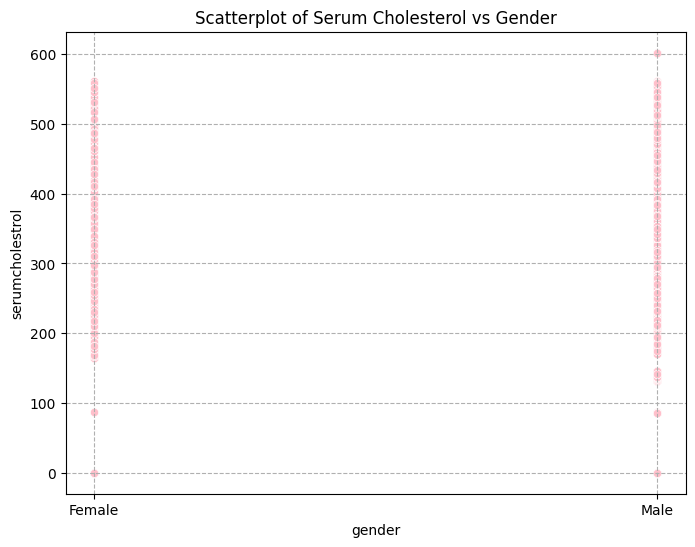

In [216]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x='gender', y='serumcholestrol', color='pink')
plt.xticks([0,1], ['Female', 'Male'])
plt.title('Scatterplot of Serum Cholesterol vs Gender')
plt.grid(True, linestyle='--')
plt.show()

Heatmap

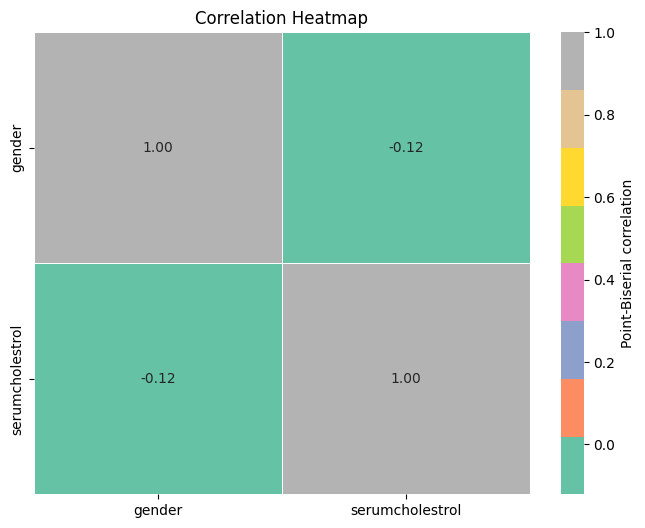

In [196]:
correlation_matrix = data[['gender', 'serumcholestrol']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Set2', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Point-Biserial correlation'})
plt.title('Correlation Heatmap')
plt.show()

In [173]:
mean_cholesterol_by_gender = data.groupby('gender')['serumcholestrol'].mean()
print(mean_cholesterol_by_gender)

gender
0    340.289362
1    302.586928
Name: serumcholestrol, dtype: float64


- A Point-Biserial correlation of -0.12 indicates a weak negative correlation between gender and serum cholesterol levels.


- The negative correlation is statistically significant since p-value is 0.0001 (p < 0.05), but the effect is weak. Gender may have a slight influence on cholesterol levels, but this alone shouldn't make decision about cholesterol,and additional factors should be considered when analyzing serum cholesterol levels in more depth.

- Females(0) on average have higher cholesterol levels than males(1), but the relationship is weak.

Is there a Phi coefficient correlation between exercise angina and fasting blood sugar?

In [179]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['exerciseangia'], data['fastingbloodsugar'])
print(contingency_table)

fastingbloodsugar    0    1
exerciseangia              
0                  356  146
1                  348  150


In [180]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2 / data.shape[0])

print(f"Phi Coefficient: {phi_coefficient:.4f}")
print(f"P-Value: {p:.4f}")

Phi Coefficient: 0.0092
P-Value: 0.7719


Scatterplot

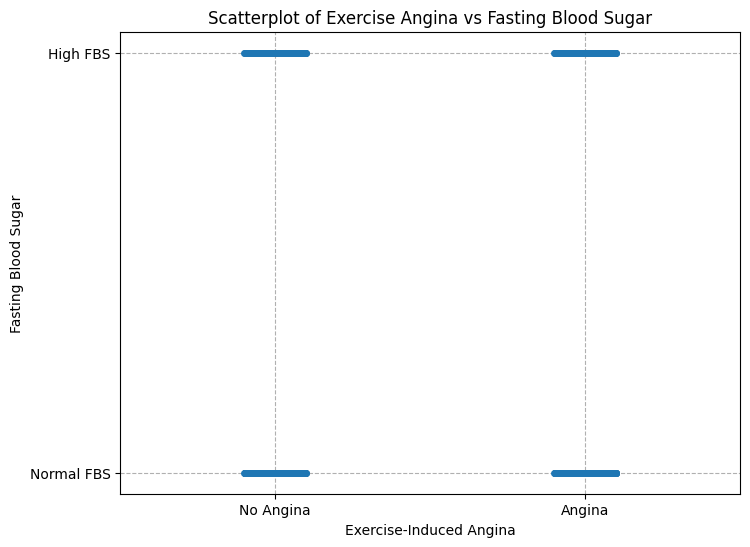

In [217]:
plt.figure(figsize=(8,6))
sns.stripplot(x=data['exerciseangia'], y=data['fastingbloodsugar'])
plt.xticks([0,1], ['No Angina', 'Angina'])
plt.yticks([0,1], ['Normal FBS', 'High FBS'])
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Fasting Blood Sugar')
plt.title('Scatterplot of Exercise Angina vs Fasting Blood Sugar')
plt.grid(True, linestyle='--')
plt.show()

Heatmap

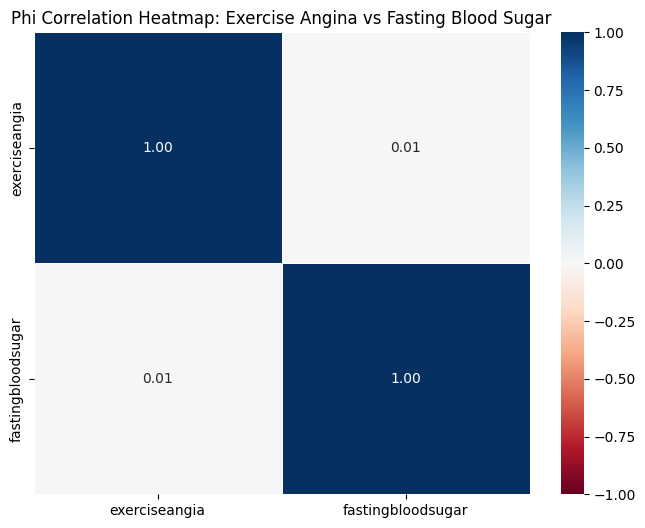

In [221]:
correlation_ma = pd.DataFrame([[1, phi_coefficient], 
                                [phi_coefficient, 1]], 
                                index=['Exercise Angina', 'Fasting Blood Sugar'],
                                columns=['Exercise Angina', 'Fasting Blood Sugar'])

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.title('Phi Correlation Heatmap: Exercise Angina vs Fasting Blood Sugar')
plt.show()

- The Phi coefficient is 0.0092, very close to 0, indicating an extremely weak or negligible correlation between exercise angina and fasting blood sugar.

- A p-value of 0.7719 is much higher than the common significance threshold (0.05), suggesting the correlation is not statistically significant.


Is there a Kendall's Tau correlation between resting blood pressure and serum cholesterol levels?

In [212]:
from scipy.stats import kendalltau

tau, p_value = kendalltau(data['restingBP'], data['serumcholestrol'])

print(f"Kendall's Tau Correlation: {tau:.4f}")
print(f"P-Value: {p_value}")

Kendall's Tau Correlation: 0.0983
P-Value: 3.977978160425232e-06


Scatterplot

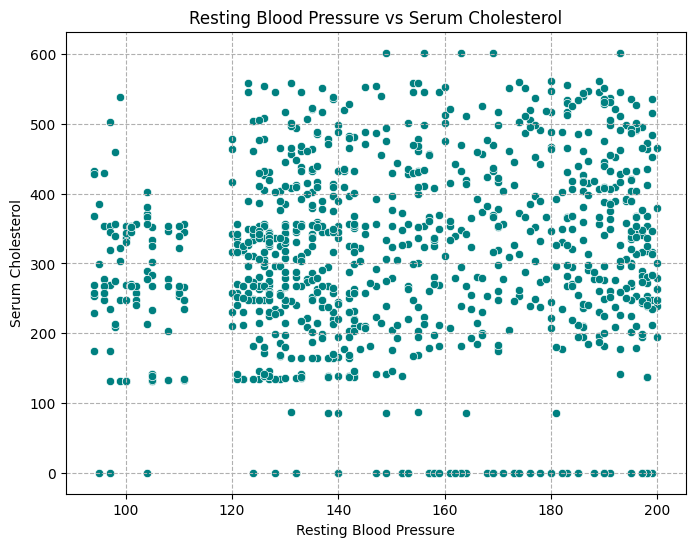

In [214]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['restingBP'], y=data['serumcholestrol'], color='teal')
plt.title('Resting Blood Pressure vs Serum Cholesterol')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Serum Cholesterol')
plt.grid(True, linestyle='--')
plt.show()

Heatmap

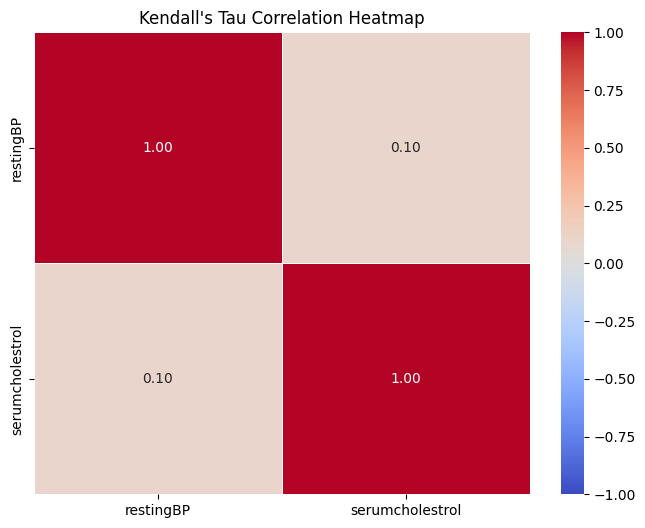

In [220]:
correlation_mat = data['restingBP'].to_frame().join(data['serumcholestrol']).corr(method='kendall')

plt.figure(figsize=(8,6))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Kendall\'s Tau Correlation Heatmap')
plt.show()

- The Kendall's tau correlation is almost 0.10, indicating weak positive correlation between the variables and the data points scattered randomly.

- P-value is statistically significant, meaning there is a reliable but small association between the variables.

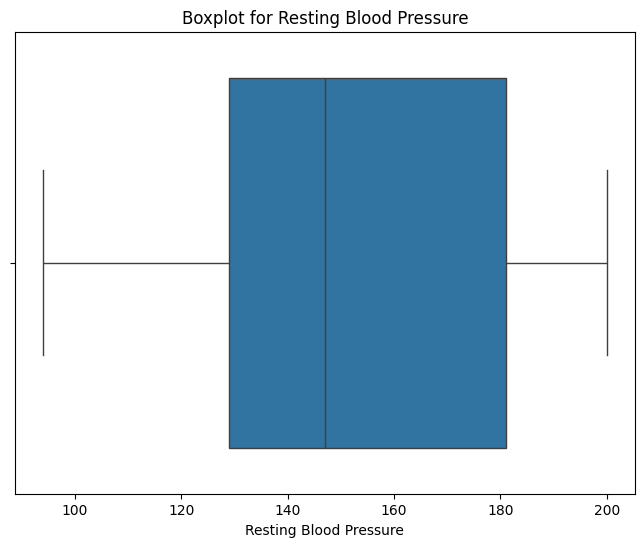

In [232]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['restingBP'])

plt.title('Boxplot for Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.show()

2. (4) Interpretation & Real-World Application

- From hypothesis, high cholesterol may be contributing to chest pain or other heart-related issues. Therefore, promoting cholesterol management as part of routine healthcare screenings, especially in individuals with a family history of heart diesease is important to prevent an issue.

- From second hypothesis, age might not be as strongly associated with cardiovascular disease prevalence as we traditionally expected, meaning other factors like lifestyle choices or genetic predisposition might be more important than how age affect.

- We can develop health promotion strategies targeting both younger and older population regarding other factors like smoking, diet, and physical activity.

- From the Pearson and Spearman Correlation, Age is often associated with the cholesterol increase, but it is not a primary factor in the dataset. The lifestyle choices such as diet and exercise could play a bigger role in determining cholesterol levels.

- People can monitor their cholesterol levels through regular health checkups, focusing on diet and exercise regardless of age.

- From the Point-Biserial Correlation, males have lower cholesterol levels compared to females, indicating gender is significantly related to cholesterol levles. This could be linked to gender-specific behaviours, hornomal influences, or other factors.

- There is a slight association between blood pressure and cholesterol but significant. Individuals with higher blood pressure might have slightly higher cholesterol, but many other factors could be influencing these variables such as diet, exercise, genetics and other health conditions.

3. Real-World Scenarios

Hypothesis: The serum cholesterol levels are significantly associated with chest pain.

- 52 years old John feels tightness and discomfort in his chest when walking upstairs. There was no pain when resting.

He had a medical history of:
- Total Cholesterol: 260 mg/dL (High, normal is <200 mg/dL)
- LDL ("Bad" Cholesterol): 170 mg/dL (Very High)
- HDL ("Good" Cholesterol): 35 mg/dL (Low)
- Resting Blood Pressure: 138/85 mmHg (Pre-Hypertensive)
- Body Mass Index (BMI): 29 (Overweight)
- No history of diabetes, but his father had a heart attack at age 55.

John has high cholesterol, contributing to chest pain due to narrowed coronary arteries. If untreated, this could lead to a heart attack.


Healthcare Interventions:

1. Lifestyle changes:
- Diet, Quit Smoking

2. Medications:
- Statins, Aspirin


If untreated, John's condition could progress to unstable angina like chest pain even when he rests or heart attack due to complete artery blockage.
If treated early enough, cholesterol-lowering interventions can reduce his risk by 30-40%.

Hypothesis 2: No Significant Difference in Cardiovascular Disease Between Older and Younger Patients

Patient 1: Mike, 32 Years Old
- Lifestyle: Works a stressful desk job, eats fast food daily, no exercise.
- Medical History:
    - High LDL Cholesterol (160 mg/dL)
    - Borderline High Blood Pressure (130/85 mmHg)
    -  BMI: 31 (Obese)
    - Smokes 1 pack per day

Patient 2: Susan, 65 Years Old
- Lifestyle: Retired, follows a Mediterranean diet, walks 5 times per week.
- Medical History:
    - Normal LDL Cholesterol (110 mg/dL)
    - Normal Blood Pressure (118/75 mmHg)
    - BMI: 24 (Healthy Weight)
    - No history of smoking or diabetes



* Focus on lifestyle interventions for ages rather than assuming heart disease is only a concern for older adults.
    - cut out fast food
    - exercise at least 3 times a week
    - quit smoking
    - statin therapy
    - blood pressure monitoring

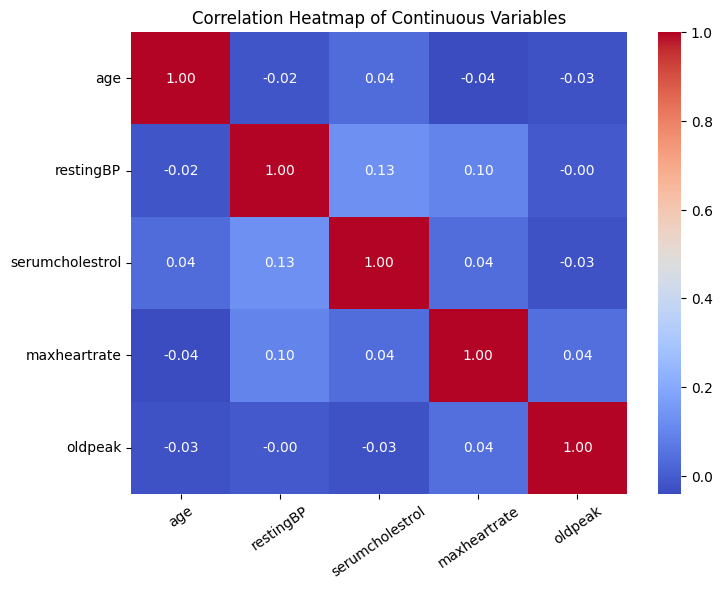

In [132]:
# Visualize a heatmap of correlations to see the correlation between all pairs of continuous variables.
corr_matrix = data[continuous_variables].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Continuous Variables')
plt.xticks(rotation=35)
plt.show()